# NOTEBOOK_ML📕
Prévision crédit Immobilier 

In [138]:
import mysql.connector

In [139]:
data_base = mysql.connector.connect(host="localhost" , user="root" , password="youcef" , database="loan_prediction")
cur = data_base.cursor(buffered=True)
query = "select * from loan_prediction.df_clean_train"
cur.execute(query)
tables = cur.fetchone()

In [140]:
# Importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix , classification_report
from scikitplot.estimators import plot_learning_curve
import scikitplot as skplt
from yellowbrick.model_selection import LearningCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
import pickle

In [141]:
df_clean=pd.read_sql(query , data_base)

In [142]:
df_clean


,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
559,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
561,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [143]:
df_clean.head()

,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [144]:
# df_clean.drop(['Loan_ID'], axis=1)

In [149]:
lBE = LabelEncoder()
categ = ["Loan_Status","Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
df_clean

,MyUnknownColumn,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,LP002974,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
559,609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
560,611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
561,612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [152]:
df_clean = df_clean.drop(['Loan_ID', 'MyUnknownColumn'], axis=1)


In [153]:
# sur la target
# df_clean.Loan_Status=df_clean.Loan_Status.map({'Y':1,'N':0})

In [154]:
# Convertir le target a une valeur numerique binaire 
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['Loan_Status'] = le.fit_transform(df_clean['Loan_Status'])
# df_clean.head()

In [155]:
X = df_clean.drop(["Loan_Status"], axis=1)
y = df_clean.Loan_Status

In [156]:
# X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [157]:
# X_train.shape

In [158]:
# y_train.shape

In [159]:
# preprocessing_StandardScaler = Pipeline(steps=[
#     ("standardscaler", StandardScaler())])

In [160]:
# # automatise le SMOTE
# Dummy_smote = SMOTE( sampling_strategy='auto')

In [161]:
# DummyPipeline = imbpipeline(steps=[["smote" , Dummy_smote],
#                                ["classifier", DummyClassifier()]])

In [162]:
# fit sur le X et y train
# DummyPipeline.fit(X_train, y_train)

In [163]:
# df_credit.Loan_Status.head(10)

In [164]:
df_clean

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
559,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
560,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
561,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [165]:
df_clean.dropna(inplace=True)


In [166]:
# df_clean[:-2]

In [167]:
y.isnull().sum()

0

In [168]:
# X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size = 0.2)

In [169]:
# X = df_clean.drop(["Loan_Status"], axis=1)
# y = df_clean.Loan_Status

In [170]:
# X_train.shape

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 )

In [172]:
# y_train = LabelEncoder()
# categ = ['Loan_Status']
# df_clean[categ] = df_clean[categ].apply(lBE.fit_transform)
# df_clean

In [173]:
# ohe = OneHotEncoder(handle_unknown='ignore')
# X_train_ohe=pd.DataFrame(ohe.fit_transform(X_train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]).toarray())
# X_train_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])

# X_test_ohe=pd.DataFrame(ohe.transform(X_test[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]).toarray())
# X_test_ohe.columns = ohe.get_feature_names(["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])

# FEATURE SCALING

# Preprocessing

In [174]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [175]:
preprocessing_MinMaxScaler = Pipeline(steps=[
    ("MinMaxscaler", MinMaxScaler())])

In [176]:
# preprocessing_StandardScaler = Pipeline(steps=[
#     ("standardscaler", StandardScaler())])

In [177]:
sm = SMOTE(sampling_strategy='auto')

In [178]:
# colors = ["#69b3a2", "#4374B3"]
# sns.set_palette(sns.color_palette(colors))

# df_clean_value = df_clean['Loan_Status'].value_counts()
# plt.figure(figsize=(8,8))
# plt.pie(df_clean_value,autopct='%1.2f%%',labels=df_clean_value.index)
# plt.show()

# 1) Iteration_DummyClassifier

In [237]:
Dummy_smote = SMOTE(sampling_strategy='auto')

In [238]:
DummyPipeline = imbpipeline(steps=[["smote", Dummy_smote],
                                  ["classifier", DummyClassifier()]])

In [239]:
# LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
#                                     ['classifier', LogisticRegression()]])

In [240]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [241]:
pipeline_DC = imbpipeline(steps = [['SMOTE', sm],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [242]:
pipeline_DC.fit(X_train, y_train)

Pipeline(steps=[('SMOTE', SMOTE()),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [243]:
pipeline_DC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DummyClassifier(strategy="uniform")]
                                    ])

In [244]:
pipeline_DC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [245]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test , y_test))

accuracy train : 0.504
accuracy test : 0.584


In [255]:
y_pred_pipeline_DC = pipeline_DC.predict(X_test) 

In [256]:
print(classification_report(y_test, y_pred_pipeline_DC))

              precision    recall  f1-score   support

           0       0.27      0.34      0.30        38
           1       0.61      0.52      0.56        75

    accuracy                           0.46       113
   macro avg       0.44      0.43      0.43       113
weighted avg       0.49      0.46      0.47       113



# Matrice confusion

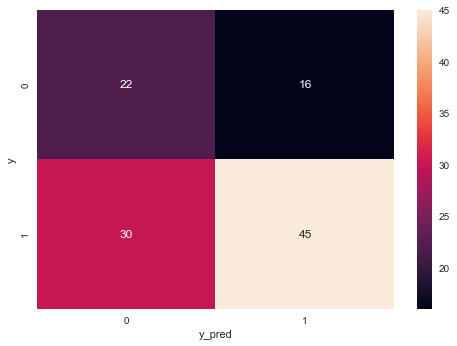

In [248]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_pipeline_DC)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

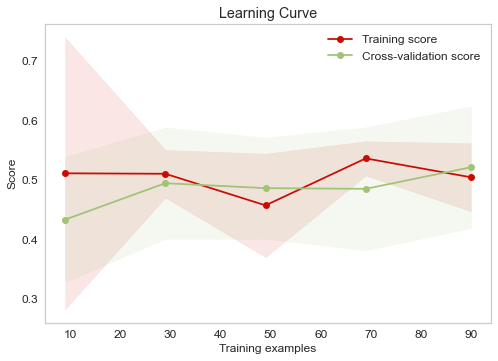

In [249]:
plot_learning_curve(pipeline_DC, X_test , y_test)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

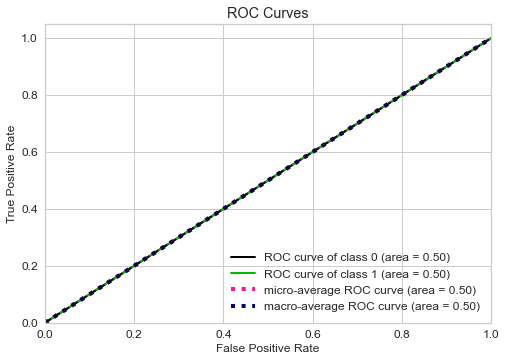

In [250]:
pipeline_DC.fit(X_train, y_train)
y_probas = pipeline_DC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 2) Iteration LogisiticRegression

In [195]:
LogicReg = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', LogisticRegression()]])

In [196]:
LogicReg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', LogisticRegression()]])

In [197]:
print("accuracy train : %.3f"%LogicReg.score(X_train, y_train))
print("accuracy test : %.3f"%LogicReg.score(X_test , y_test))   

accuracy train : 0.816
accuracy test : 0.796


In [198]:
y_pred_LogicReg = LogicReg.predict(X_test) 

In [199]:
print(classification_report(y_test, y_pred_LogicReg))

              precision    recall  f1-score   support

           0       1.00      0.39      0.57        38
           1       0.77      1.00      0.87        75

    accuracy                           0.80       113
   macro avg       0.88      0.70      0.72       113
weighted avg       0.84      0.80      0.77       113



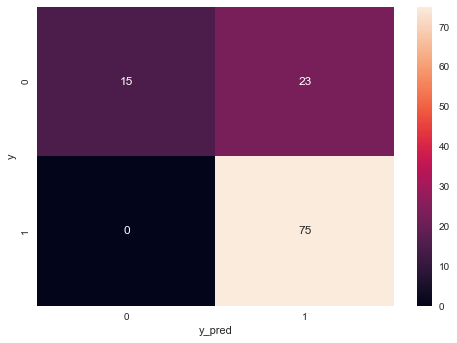

In [200]:
# Matrice confusion
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_LogicReg)

# Learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

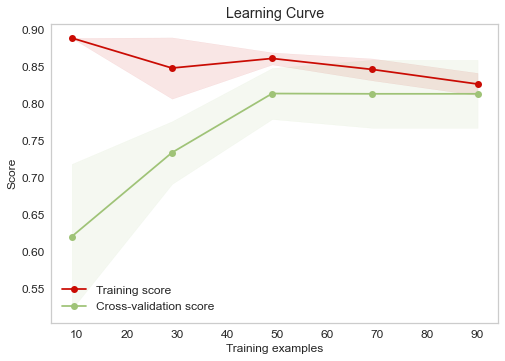

In [201]:
plot_learning_curve(LogicReg,X_test , y_test)

# ROC-AUC

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

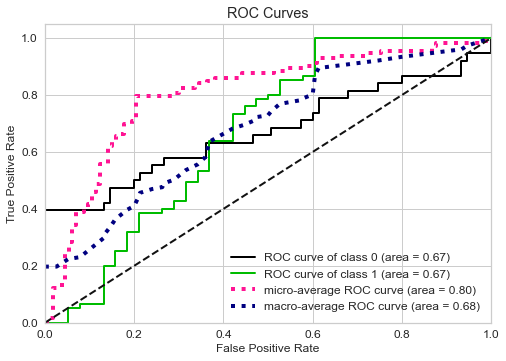

In [202]:
LogicReg.fit(X_train, y_train)
y_probas = LogicReg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 3) Iteration KNeighborsClassifier

In [203]:
KNC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', KNeighborsClassifier()]])

In [204]:
KNC.fit(X_train, y_train)   

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [205]:
print("accuracy train : %.3f"%KNC.score(X_train, y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.820
accuracy test : 0.779


In [206]:
y_pred_KNC = KNC.predict(X_test) 

In [207]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.76      0.97      0.85        75

    accuracy                           0.78       113
   macro avg       0.82      0.68      0.70       113
weighted avg       0.80      0.78      0.75       113



# matrice confusion

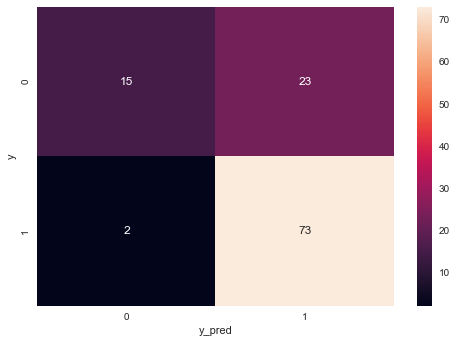

In [208]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

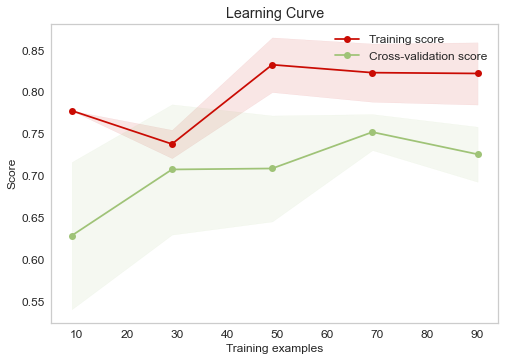

In [209]:
plot_learning_curve(KNC,X_test , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

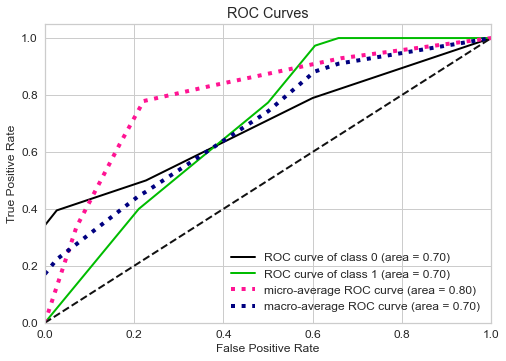

In [210]:
KNC.fit(X_train, y_train) 
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 4) Iteration- DecisionTree

In [211]:
DeT = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', DecisionTreeClassifier()]])

In [212]:
KNC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', KNeighborsClassifier()]])

In [213]:
print("accuracy train : %.3f"%KNC.score(X_train, y_train))
print("accuracy test : %.3f"%KNC.score(X_test , y_test))

accuracy train : 0.820
accuracy test : 0.779


In [214]:
y_pred_KNC = KNC.predict(X_test) 

In [215]:
print(classification_report(y_test, y_pred_KNC))

              precision    recall  f1-score   support

           0       0.88      0.39      0.55        38
           1       0.76      0.97      0.85        75

    accuracy                           0.78       113
   macro avg       0.82      0.68      0.70       113
weighted avg       0.80      0.78      0.75       113



# matrice confusion

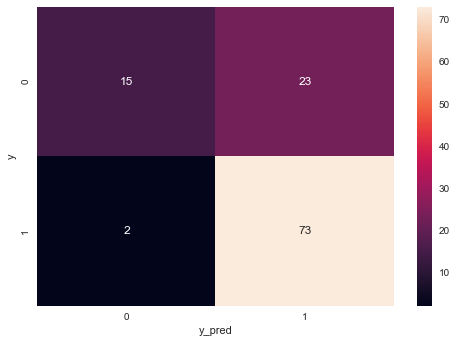

In [216]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_KNC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

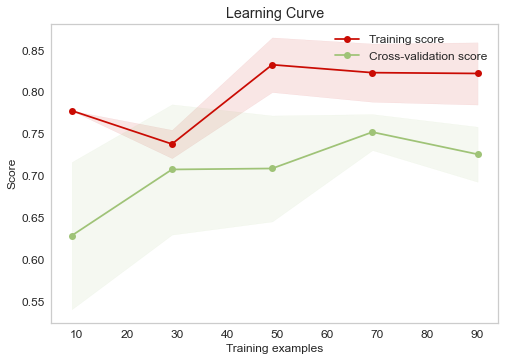

In [217]:
plot_learning_curve(KNC, X_test , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

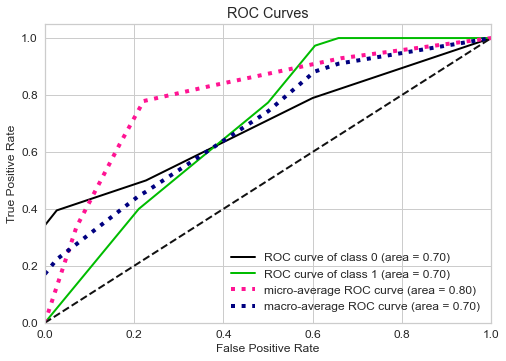

In [218]:
KNC.fit(X_train, y_train)
y_probas = KNC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 5) Iteration-Bagging(RandomForestClassifier)

In [219]:
RFC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', RandomForestClassifier()]])

In [220]:
RFC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', RandomForestClassifier()]])

In [221]:
print("accuracy train : %.3f"%RFC.score(X_train, y_train))
print("accuracy test : %.3f"%RFC.score(X_test , y_test))

accuracy train : 1.000
accuracy test : 0.788


In [222]:
y_pred_RFC = RFC.predict(X_test) 

In [223]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.94      0.39      0.56        38
           1       0.76      0.99      0.86        75

    accuracy                           0.79       113
   macro avg       0.85      0.69      0.71       113
weighted avg       0.82      0.79      0.76       113



# matrice confusion

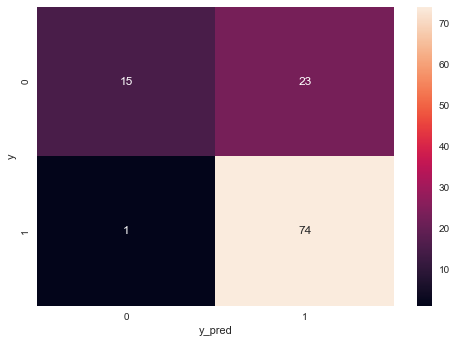

In [224]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_RFC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

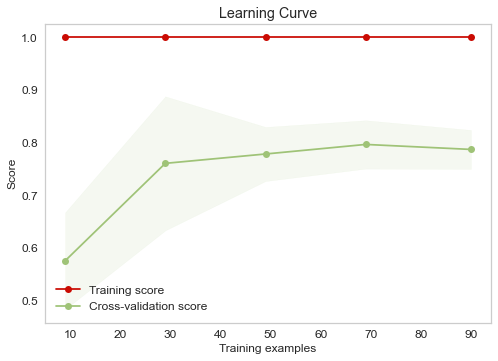

In [225]:
plot_learning_curve(RFC, X_test , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

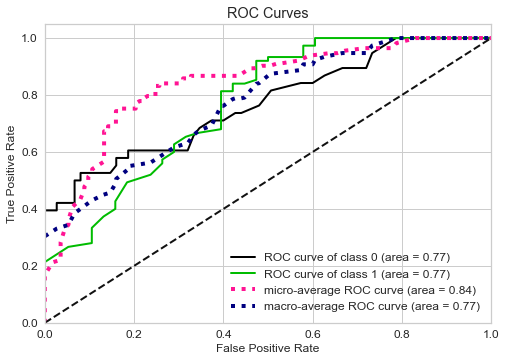

In [227]:
RFC.fit(X_train, y_train)
y_probas = RFC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

# 6) Iteration-Boosting(GradientBoostingClassifier)

In [257]:
GBC = Pipeline(steps = [['preprocessing_MinMaxScaler', preprocessing_MinMaxScaler],
                                    ['classifier', GradientBoostingClassifier()]])

In [258]:
GBC.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_MinMaxScaler',
                 Pipeline(steps=[('MinMaxscaler', MinMaxScaler())])),
                ['classifier', GradientBoostingClassifier()]])

In [259]:
print("accuracy train : %.3f"%GBC.score(X_train, y_train))
print("accuracy test : %.3f"%GBC.score(X_test , y_test))

accuracy train : 0.904
accuracy test : 0.779


In [266]:
y_pred_GBC = GBC.predict(X_test) 

In [267]:
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.77      0.95      0.85        75

    accuracy                           0.78       113
   macro avg       0.79      0.70      0.71       113
weighted avg       0.78      0.78      0.76       113



# matrice confusion

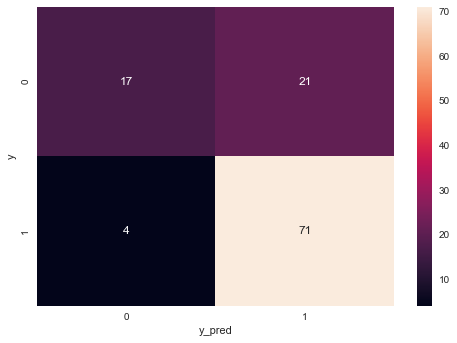

In [268]:
def plot_confusion_matrix(y, y_pred):
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.show()

plot_confusion_matrix(y_test, y_pred_GBC)

# learning-Curve

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

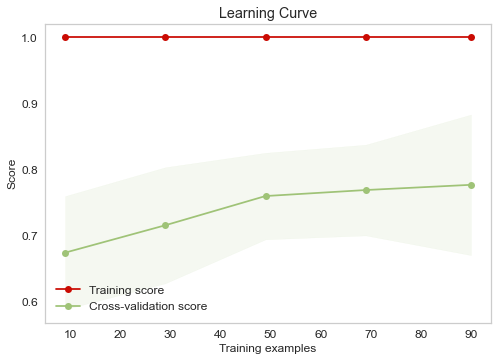

In [269]:
plot_learning_curve(GBC,X_test , y_test)

# roc-auc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

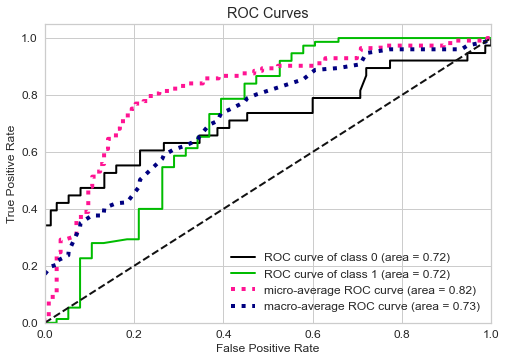

In [270]:
GBC.fit(X_train, y_train)
y_probas = GBC.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [265]:
# model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
# classify(model, X, y)

In [ ]:
# faire une prevision 
profil_test=[[1,1,1,0,0,0,1,0,1,0,100,0,400,360]]
RFC.predict(profil_test)

# Enregsiter le modele

In [251]:
with open('model_pkl.pickle', 'wb') as files:
    pickle.dump(GBC, files)

In [ ]:
# pickle.dump(RFC,open('model.pkl','wb'))

In [ ]:
# filename="model.pkl"


In [ ]:
# import pickle
# with open(filename, 'wb') as f:
#     pickle.dump(RFC, f)

In [ ]:
# with open(filename, 'rb') as f:
#     m = pickle.load(f)

# PICKLE

In [ ]:
# # Export pipeline as pickle file
# with open("model.pkl", "wb") as file:
#     pickle.dump(pipe_model, file)

# # Load pipeline from pickle file
# my_pipeline = pickle.load(open("model.pkl","rb"))

# # Et on test le score
# my_pipeline.score(X_test, y_test)

In [254]:
# import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(GBC, file)